In [1]:
import numpy as np
from openpyxl import load_workbook
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import fsolve

In [2]:
def tanh(t, a, b, c , dbtt):
    return a + b * np.tanh((t-dbtt)/c)

def rev_tanh(t, a, b, c , dbtt):
    return (a + b * np.tanh((-t-dbtt)/(c)))

dbtt: -15.756861805200273
fatt: -16.35132702654053
ls: -5.145295948674388
us: 162.3736264149207


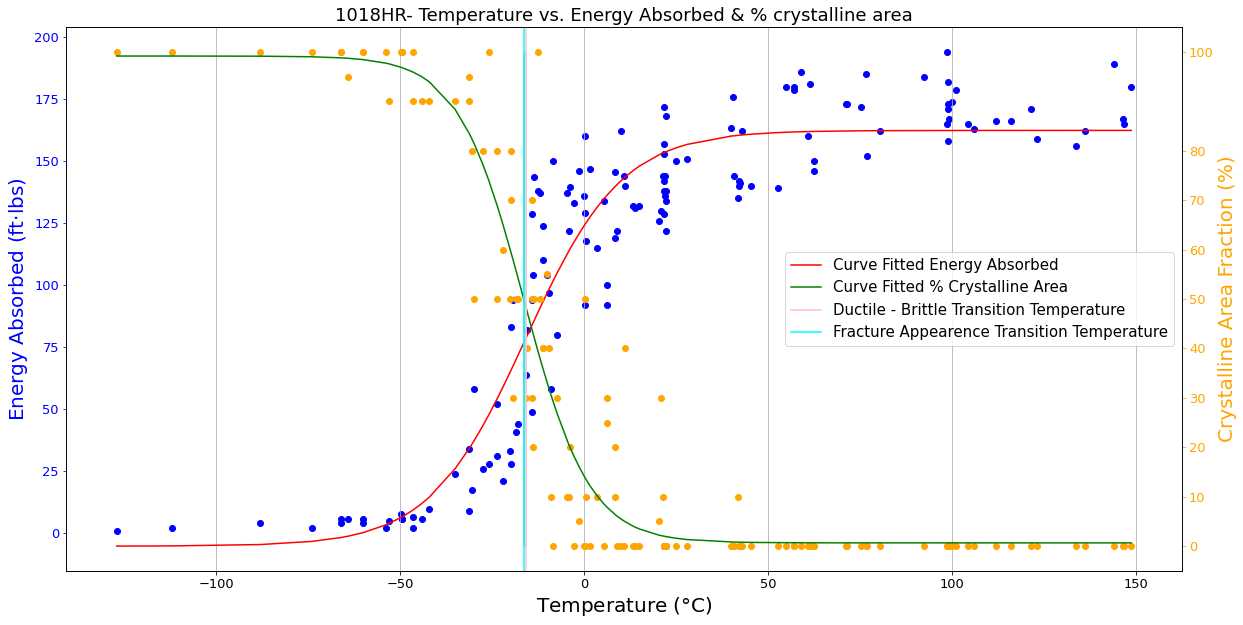

In [110]:
wb = load_workbook("/Users/kunwoosmac/Desktop/Fall 2023/MMAE 419/2.Charpy/Charpy Impact_BB(1).xlsx")

name = '1018HR'

fig_path = '/Users/kunwoosmac/Desktop/Fall 2023/MMAE 419/2.Charpy/figures'
ws = wb[name]

r = ws.max_row + 1

temp = np.array([ws.cell(i,1).value for i in range(3, r)])
energy = np.array([ws.cell(i,2).value for i in range(3, r)])
CAF = np.array([ws.cell(i,3).value for i in range(3, r)])

fig, ax1 = plt.subplots(figsize = (20,10))
plt.title(name + "- Temperature vs. Energy Absorbed & % crystalline area", fontsize = 18)

l1 = ax1.scatter(temp, energy, label = "Energy", c = 'blue')
ax1.set_ylabel("Energy Absorbed (ft$\cdot$lbs)", fontsize = 20, color = 'b')
ax1.set_xlabel("Temperature ($\degree$C)", fontsize = 20)
ax1.xaxis.grid()

pars1, _ = curve_fit(f = tanh, xdata = temp, ydata = energy)

ls = pars1[0] - pars1[1]
us = pars1[0] + pars1[1]
dbtt1 = pars1[3]

l2 = ax1.plot(temp, tanh(temp, pars1[0], pars1[1],pars1[2],pars1[3]), c = 'red', label = "Curve Fitted Energy Absorbed")

ax1.tick_params(axis='y', colors='blue')
# ax1.grid()
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
ax2 = ax1.twinx()

l3 = ax2.scatter(temp, CAF, label = "Energy", c = 'orange')
ax2.set_ylabel("Crystalline Area Fraction (%)", fontsize = 20, color = 'orange')

pars2, _ = curve_fit(f = tanh, xdata = temp, ydata = CAF)
l4 = ax2.plot(temp, rev_tanh(-temp, pars2[0], pars2[1], pars2[2], pars2[3]), c = 'green', label = "Curve Fitted % Crystalline Area")

    
l5 = ax2.plot([dbtt1, dbtt1], [100, 0], c = 'pink', label = "Ductile - Brittle Transition Temperature")
ax2.axvline(dbtt1, c = 'pink')

t_range = np.linspace(-50, 0, 50000)
for t in t_range:
    if np.abs(rev_tanh(-t, pars2[0], pars2[1], pars2[2], pars2[3]) - 50) <= 0.001:
#         print(t)
        fatt = t
#         print(rev_tanh(-t, pars2[0], pars2[1], pars2[2], pars2[3]))

l6 = ax2.plot([fatt, fatt], [100, 0], c = 'cyan', label = "Fracture Appearence Transition Temperature")
ax2.axvline(fatt, c = 'cyan')


leg = l2 + l4 + l5 + l6
labs = [l.get_label() for l in leg]
ax2.legend(leg, labs, loc=7, fontsize = 15)
ax2.tick_params(axis='y', colors='orange')
ax2.set_yticks([0,10,20,30,40,50,60,70,80,100])

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

print("dbtt:",dbtt1)



print("fatt:",fatt)
print("ls:",ls)
print("us:",us)
plt.savefig("/Users/kunwoosmac/Desktop/Fall 2023/MMAE 419/2.Charpy/figures/1018HR.png")

dbtt: 36.904689005302366
fatt: 44.60889217784356
ls: 4.035856677428146
us: 39.26496886925287


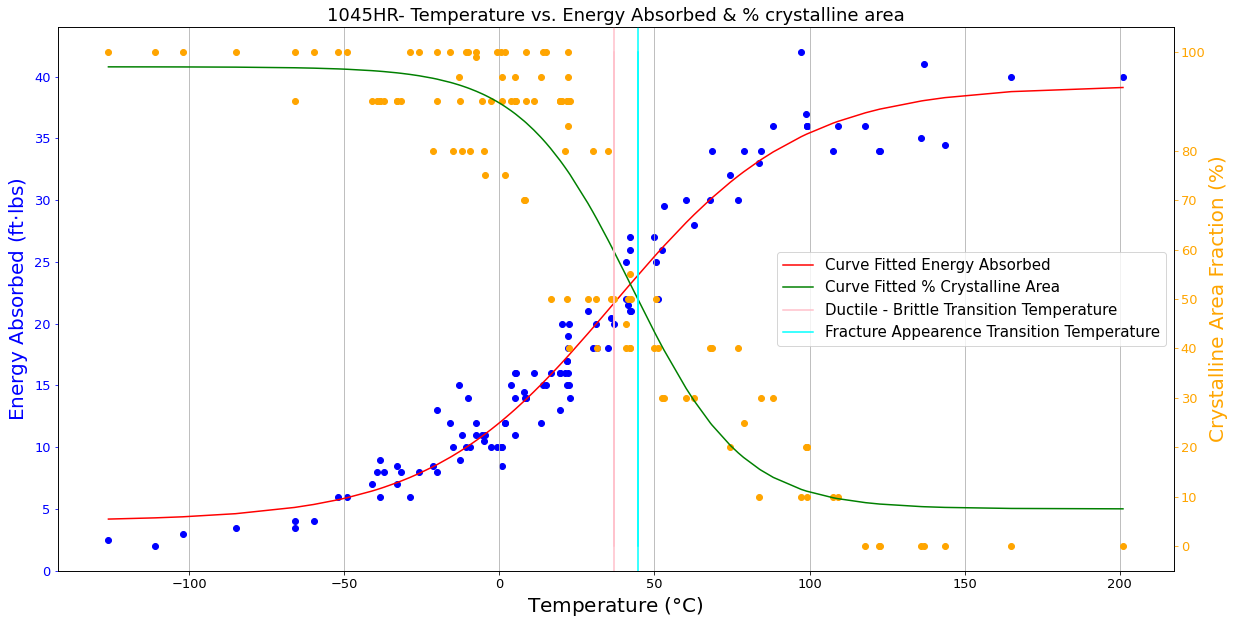

In [111]:
wb = load_workbook("/Users/kunwoosmac/Desktop/Fall 2023/MMAE 419/2.Charpy/Charpy Impact_BB(1).xlsx")

name = '1045HR'

fig_path = '/Users/kunwoosmac/Desktop/Fall 2023/MMAE 419/2.Charpy/figures'
ws = wb[name]

r = ws.max_row + 1

temp = np.array([ws.cell(i,1).value for i in range(3, r)])
energy = np.array([ws.cell(i,2).value for i in range(3, r)])
CAF = np.array([ws.cell(i,3).value for i in range(3, r)])

fig, ax1 = plt.subplots(figsize = (20,10))
plt.title(name + "- Temperature vs. Energy Absorbed & % crystalline area", fontsize = 18)

l1 = ax1.scatter(temp, energy, label = "Energy", c = 'blue')
ax1.set_ylabel("Energy Absorbed (ft$\cdot$lbs)", fontsize = 20, color = 'b')
ax1.set_xlabel("Temperature ($\degree$C)", fontsize = 20)
ax1.xaxis.grid()

pars1, _ = curve_fit(f = tanh, xdata = temp, ydata = energy)

ls = pars1[0] - pars1[1]
us = pars1[0] + pars1[1]
dbtt1 = pars1[3]

l2 = ax1.plot(temp, tanh(temp, pars1[0], pars1[1],pars1[2],pars1[3]), c = 'red', label = "Curve Fitted Energy Absorbed")

ax1.tick_params(axis='y', colors='blue')
# ax1.grid()
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
ax2 = ax1.twinx()

l3 = ax2.scatter(temp, CAF, label = "Energy", c = 'orange')
ax2.set_ylabel("Crystalline Area Fraction (%)", fontsize = 20, color = 'orange')

pars2, _ = curve_fit(f = tanh, xdata = temp, ydata = CAF)
l4 = ax2.plot(temp, rev_tanh(-temp, pars2[0], pars2[1], pars2[2], pars2[3]), c = 'green', label = "Curve Fitted % Crystalline Area")

    
l5 = ax2.plot([dbtt1, dbtt1], [100, 0], c = 'pink', label = "Ductile - Brittle Transition Temperature")
ax2.axvline(dbtt1, c = 'pink')

t_range = np.linspace(0, 50, 50000)
for t in t_range:
    if np.abs(rev_tanh(-t, pars2[0], pars2[1], pars2[2], pars2[3]) - 50) <= 0.001:
#         print(t)
        fatt = t
#         print(rev_tanh(-t, pars2[0], pars2[1], pars2[2], pars2[3]))

l6 = ax2.plot([fatt, fatt], [100, 0], c = 'cyan', label = "Fracture Appearence Transition Temperature")
ax2.axvline(fatt, c = 'cyan')


leg = l2 + l4 + l5 + l6

labs = [l.get_label() for l in leg]
ax2.legend(leg, labs, loc=7, fontsize = 15)
ax2.tick_params(axis='y', colors='orange')
ax2.set_yticks([0,10,20,30,40,50,60,70,80,100])

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

print("dbtt:",dbtt1)


print("fatt:",fatt)
print("ls:",ls)
print("us:",us)
plt.savefig("/Users/kunwoosmac/Desktop/Fall 2023/MMAE 419/2.Charpy/figures/1045HR.png")